# **Введение**
В данном файле будет проведен разведочный анализ данных (EDA) датасета, взятого с сайта **kaggle.com.**

Исходные данные с kaggle.com: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset?resource=download \
Ссылка на датасет в Google Drive: https://drive.google.com/drive/folders/10_vT1Pt0w413sym9fv7I4KWLi_7YApd0?dmr=1&ec=wgc-drive-globalnav-goto 

Данный датасет представляет собой результаты опроса студентов по уровню депрессии, собранные в рамках исследования факторов психического здоровья студентов в виде таблицы по 18 признакам:

1. id - номер;
2. Gender - пол;
3. Age - возраст;
4. City - город;
5. Profession - профессия;
6. Academic Pressure - академическая нагрузка;
7. Work Pressure - рабочая нагрузка;
8. CGPA - средний балл;
9. Study Satisfaction - удовлетворение учебой;
10. Job Satisfaction - удовлетворение работой;
11. Sleep Duration - длительность сна;
12. Dietary Habits - пищевые привычки;
13. Degree - квалификация;
14. Have you ever had suicidal thoughts ? - возникали ли у вас когда-либо суицидальные мысли?;
15. Work/Study Hours - рабочие\учебные часы;
16. Financial Stress - финансовые проблемы;
17. Family History of Mental Illness - ментальные заболевания у родственников;
18. Depression - депрессия.

# **Цель анализа данных**
1. Определить зависимость наличия (или отсутствия) депрессии у студентов от таких признаков, как Academic Pressure, CGPA, Study Satisfaction, Work/Study Hours, Sleep Duration в соответствии с нижеперечисленными требованиями:
- оценка структуры;
- оценка целостности и полноты;
- оценка выбросов и аномалий;
- метрики качества данных;
- выводы по разделам.


# 1. Загрузка датасета

Необходимо импортировать данные с Google Drive для дальнейшей работы с ними. 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'


file_id = "1qkzC64D8GnLRwpQFl6vhD1C7tLgM6LM6"
file_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(file_url)

Выведем первые и последние 10 строк датасета

In [3]:
df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In [4]:
df.tail(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27891,140645,Female,28.0,Thane,Student,4.0,0.0,7.77,3.0,0.0,'Less than 5 hours',Unhealthy,MSc,No,2.0,5.0,No,1
27892,140669,Female,20.0,Indore,Student,3.0,0.0,7.72,5.0,0.0,'Less than 5 hours',Moderate,'Class 12',Yes,8.0,1.0,No,0
27893,140672,Female,24.0,Hyderabad,Student,3.0,0.0,6.02,2.0,0.0,'7-8 hours',Moderate,B.Arch,No,8.0,2.0,No,0
27894,140681,Male,23.0,Srinagar,Student,3.0,0.0,6.00,2.0,0.0,'More than 8 hours',Healthy,MBBS,Yes,12.0,4.0,No,0
27895,140684,Male,31.0,Lucknow,Student,2.0,0.0,7.27,5.0,0.0,'7-8 hours',Moderate,B.Com,Yes,6.0,1.0,Yes,0
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


# 2. Проверка типов данных

In [5]:
df.shape

(27901, 18)

In [6]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

Некоторые признаки не входят в цель, поэтому их можно удалить. 

На мой взгляд, признаки "Gender", "Age", "City" и "Dietary Habits" могут повлиять в какой-то степени на наличие депрессии, но в данном анализе они не будут в него включены.

Признаки "Work Pressure" и 'Job Satisfaction' можно исключить из-за крайне большого количества ответов, которые равны 0.0.

In [7]:
len(df[df['Work Pressure'] == 0.0])

27898

In [8]:
len(df[df['Job Satisfaction'] == 0.0])

27893

Удаляем из датасета ненужные признаки

In [9]:
df = df.drop(["Gender", "Age", "City", "Dietary Habits", "Job Satisfaction", "Work Pressure"], axis=1)
df.head(10)

,id,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Student,5.0,8.97,2.0,'5-6 hours',B.Pharm,Yes,3.0,1.0,No,1
1,8,Student,2.0,5.90,5.0,'5-6 hours',BSc,No,3.0,2.0,Yes,0
2,26,Student,3.0,7.03,5.0,'Less than 5 hours',BA,No,9.0,1.0,Yes,0
3,30,Student,3.0,5.59,2.0,'7-8 hours',BCA,Yes,4.0,5.0,Yes,1
4,32,Student,4.0,8.13,3.0,'5-6 hours',M.Tech,Yes,1.0,1.0,No,0
5,33,Student,2.0,5.70,3.0,'Less than 5 hours',PhD,No,4.0,1.0,No,0
6,52,Student,3.0,9.54,4.0,'7-8 hours',BSc,No,1.0,2.0,No,0
7,56,Student,2.0,8.04,4.0,'Less than 5 hours','Class 12',No,0.0,1.0,Yes,0
8,59,Student,3.0,9.79,1.0,'7-8 hours',B.Ed,Yes,12.0,3.0,No,1
9,62,Student,2.0,8.38,3.0,'Less than 5 hours',LLB,Yes,2.0,5.0,No,1


Присвоение типов данных для оставшихся признаков

In [10]:
df = df.replace("?", np.nan)
df = df.astype(
    {
        "id": "Int32",
        "Profession": "string",
        "Academic Pressure": "Int32",
        "CGPA": "float32",
        "Study Satisfaction": "Int32",
        "Sleep Duration": "string",
        "Degree": "string",
        "Have you ever had suicidal thoughts ?": "string",
        "Work/Study Hours": "Int32",
        "Financial Stress": "float32",
        "Family History of Mental Illness": "string",
        "Depression": "int8",
    }
)
df.dtypes

id                                                Int32
Profession                               string[python]
Academic Pressure                                 Int32
CGPA                                            float32
Study Satisfaction                                Int32
Sleep Duration                           string[python]
Degree                                   string[python]
Have you ever had suicidal thoughts ?    string[python]
Work/Study Hours                                  Int32
Financial Stress                                float32
Family History of Mental Illness         string[python]
Depression                                         int8
dtype: object

# 3. Проверка данных на отсутствие пропусков, уникальность идентификаторов и ключей

In [11]:
df.shape

(27901, 12)

Оценка наличия пропусков

In [12]:
df.notna().all()

id                                        True
Profession                                True
Academic Pressure                         True
CGPA                                      True
Study Satisfaction                        True
Sleep Duration                            True
Degree                                    True
Have you ever had suicidal thoughts ?     True
Work/Study Hours                          True
Financial Stress                         False
Family History of Mental Illness          True
Depression                                True
dtype: bool

In [13]:
df.isnull().all()

id                                       False
Profession                               False
Academic Pressure                        False
CGPA                                     False
Study Satisfaction                       False
Sleep Duration                           False
Degree                                   False
Have you ever had suicidal thoughts ?    False
Work/Study Hours                         False
Financial Stress                         False
Family History of Mental Illness         False
Depression                               False
dtype: bool

In [14]:
df.notna().mean().sort_values(ascending=False)


id                                       1.000000
Profession                               1.000000
Academic Pressure                        1.000000
CGPA                                     1.000000
Study Satisfaction                       1.000000
Sleep Duration                           1.000000
Degree                                   1.000000
Have you ever had suicidal thoughts ?    1.000000
Work/Study Hours                         1.000000
Family History of Mental Illness         1.000000
Depression                               1.000000
Financial Stress                         0.999892
dtype: float64

Условие метрики о полноте данных выполняется (>= 0.98)

In [15]:
dup_count = df.duplicated(subset=['id']).sum()
print("дубликаты идентификаторов:", dup_count)
id_unique = df['id'].is_unique
print("уникальность id:", id_unique)
print("количество уникальных id:", df['id'].nunique())
duplicate_rate = dup_count / df.shape[0]
print(f"коэф. повторений: {duplicate_rate:.4f}")

дубликаты идентификаторов: 0
уникальность id: True
количество уникальных id: 27901
коэф. повторений: 0.0000


Условие метрики об уникальности данных выполняется

Строковое значение признака "Sleep Duration" привело к получению числовых значений для удобства в дальнейшем анализе

In [16]:
df["Sleep Duration"].value_counts()
sleep_map = {
    "'Less than 5 hours'": 4,
    "'5-6 hours'": 5.5,
    "'7-8 hours'": 7.5,
    "'More than 8 hours'": 9
}
df = df[df["Sleep Duration"] != "Others"]
df["Sleep Duration"] = df["Sleep Duration"].map(sleep_map)
df["Sleep Duration"].value_counts(dropna=False)

Sleep Duration
4.0    8310
7.5    7346
5.5    6183
9.0    6044
Name: count, dtype: int64

In [17]:
Depr = df[df["Depression"]==1]
Depr["Sleep Duration"].value_counts(dropna=False)

Sleep Duration
4.0    5361
7.5    4371
5.5    3517
9.0    3078
Name: count, dtype: int64

In [18]:
Depr = df[df["Depression"]==0]
Depr["Sleep Duration"].value_counts(dropna=False)

Sleep Duration
7.5    2975
9.0    2966
4.0    2949
5.5    2666
Name: count, dtype: int64

# 4. Проверка на выбросы и аномалии

In [19]:
df[["id", "Academic Pressure", "CGPA", "Work/Study Hours", "Study Satisfaction", "Sleep Duration", "Depression"]].head(10)

,id,Academic Pressure,CGPA,Work/Study Hours,Study Satisfaction,Sleep Duration,Depression
0,2,5,8.97,3,2,5.5,1
1,8,2,5.90,3,5,5.5,0
2,26,3,7.03,9,5,4.0,0
3,30,3,5.59,4,2,7.5,1
4,32,4,8.13,1,3,5.5,0
5,33,2,5.70,4,3,4.0,0
6,52,3,9.54,1,4,7.5,0
7,56,2,8.04,0,4,4.0,0
8,59,3,9.79,12,1,7.5,1
9,62,2,8.38,2,3,4.0,1


In [20]:
color = "#B9375D"
fig = px.box(df, x="Academic Pressure", color_discrete_sequence=[color])
fig.update_layout(width=700, height=500)
fig.show()

In [21]:
fig = px.box(df, x="CGPA", color_discrete_sequence=[color])
fig.update_layout(width=700, height=500)
fig.show()

На графике можно увидеть точку, близкую к 0.  
Проанализировав выведенную ниже таблицу, можно сказать, что почти все полученные ниже значения являются выбросами.

In [22]:
df[df['CGPA'] < 5]

,id,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4365,21880,Student,0,0.0,0,5.5,'Class 12',No,2,3.0,No,0
10407,52737,Student,3,0.0,4,4.0,BBA,No,12,2.0,No,0
11489,58062,Student,5,0.0,0,4.0,'Class 12',Yes,11,5.0,No,1
13909,70453,Student,0,0.0,0,4.0,'Class 12',Yes,12,3.0,Yes,1
14855,75007,Student,0,0.0,0,7.5,'Class 12',Yes,3,3.0,Yes,0
20913,105773,Student,0,0.0,0,4.0,'Class 12',Yes,9,5.0,No,1
21805,110097,Student,1,0.0,5,4.0,M.Ed,Yes,10,3.0,Yes,0
25746,129756,Student,0,0.0,0,7.5,'Class 12',Yes,9,4.0,No,1
26719,134830,Student,0,0.0,0,9.0,'Class 12',No,0,5.0,No,0


In [23]:
Q1 = df["CGPA"].quantile(0.25)
Q3 = df["CGPA"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["CGPA"] < lower_bound) | (df["CGPA"] > upper_bound)]
outliers
print("Количество выбросов:", len(outliers))
print("Доля выбросов:", len(outliers) / len(df))

Количество выбросов: 9
Доля выбросов: 0.00032277731951368217


In [24]:
fig = px.box(df, x="Study Satisfaction", color_discrete_sequence=[color])
fig.update_layout(width=700, height=500)
fig.show()

In [25]:
fig = px.box(df, x="Sleep Duration", color_discrete_sequence=[color])
fig.update_layout(width=700, height=500)
fig.show()

In [26]:
fig = px.box(df, x="Work/Study Hours", color_discrete_sequence=[color])
fig.update_layout(width=700, height=500)
fig.show()

Условие метрики о доле выбросов выполняется (> 0.02)

Аномалии не обнаружены

# 5. Проверка взаимосвязей признаков и их согласованности

**1) Построим график распределения депрессии**

In [27]:
fig = px.histogram(df,
    x="Depression",
    nbins=30,                
    opacity=1,
    color_discrete_sequence=[color],
    title="Количество человек без и с депрессией"
)
fig.update_layout(
    title_font=dict(size=20),
    font=dict(size=12),
    bargap=0.05,
    xaxis_title="Уровень депрессии",
    yaxis_title="Количество человек"
)
fig.show()


**2) Построим матрицы корреляций по Пирсону и Спирману**

In [28]:
num_cols = ["Academic Pressure", "CGPA", "Work/Study Hours", "Study Satisfaction", "Sleep Duration", "Depression"]
corr_pearson = df[num_cols].corr(method="pearson")
corr_spearman = df[num_cols].corr(method="spearman")
print("Матрица корреляции Пирсона:")
display(corr_pearson.round(2))
print("Матрица корреляции Спирмена:")
display(corr_spearman.round(2))

Матрица корреляции Пирсона:


,Academic Pressure,CGPA,Work/Study Hours,Study Satisfaction,Sleep Duration,Depression
Academic Pressure,1.00,-0.02,0.10,-0.11,-0.04,0.47
CGPA,-0.02,1.00,0.00,-0.04,-0.00,0.02
Work/Study Hours,0.10,0.00,1.00,-0.04,-0.03,0.21
Study Satisfaction,-0.11,-0.04,-0.04,1.00,0.01,-0.17
Sleep Duration,-0.04,-0.00,-0.03,0.01,1.00,-0.08
Depression,0.47,0.02,0.21,-0.17,-0.08,1.00


Матрица корреляции Спирмена:


,Academic Pressure,CGPA,Work/Study Hours,Study Satisfaction,Sleep Duration,Depression
Academic Pressure,1.00,-0.02,0.09,-0.12,-0.04,0.47
CGPA,-0.02,1.00,0.00,-0.05,-0.00,0.02
Work/Study Hours,0.09,0.00,1.00,-0.04,-0.03,0.20
Study Satisfaction,-0.12,-0.05,-0.04,1.00,0.01,-0.17
Sleep Duration,-0.04,-0.00,-0.03,0.01,1.00,-0.09
Depression,0.47,0.02,0.20,-0.17,-0.09,1.00


In [29]:
num_cols = ['Academic Pressure', 'CGPA', 'Work/Study Hours', 'Study Satisfaction', 'Sleep Duration', 'Depression']
corr = df[num_cols].corr()
colors = [
    (0.0, "#B9375D"),
    (0.5, "#EEEEEE"),
    (1.0, "#B9375D")
]
fig = px.imshow(
    corr,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=colors,
    zmin=-1, zmax=1,
    title="Матрица корреляции"
)
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Корреляция",
        tickvals=[-1, -0.5, 0, 0.5, 1]
    ),
    title_font=dict(size=20),
    font=dict(size=12)
)
fig.show()

Из графиков и таблиц корреляций можно заметить, что значение признака растет вместе с вероятностью депрессии и наоборот: признак уменьшается с наличием депрессии

1. Academic Pressure и Work/Study Hours положительно связаны с депрессией

2. Sleep Duration и Study Satisfaction обратно пропорциональны уровню депрессии

3. CGPA не имеет выраженной связи с депрессией

**3) Построим график взаимосвязи между признаками**

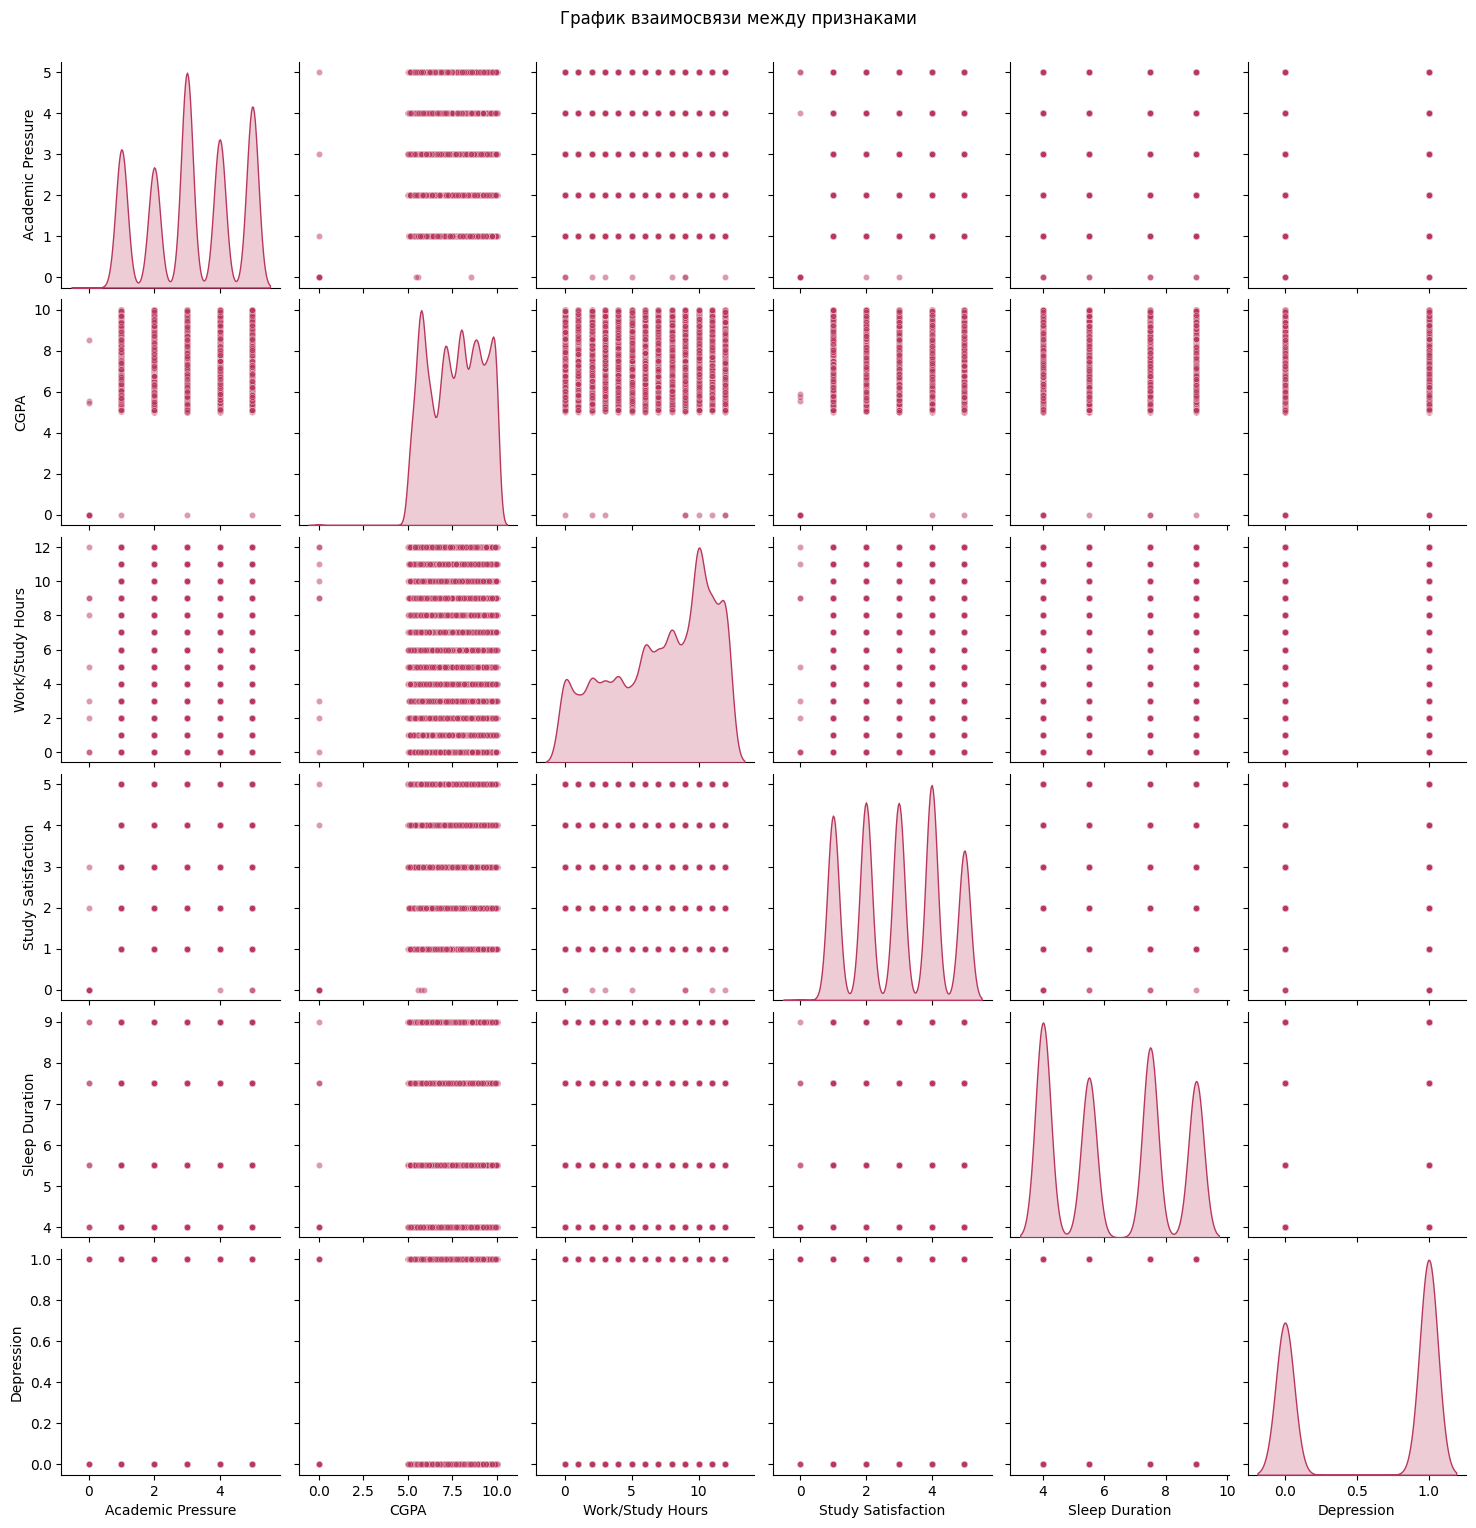

In [30]:
sns.pairplot(
    df[num_cols],
    diag_kind="kde",
    plot_kws={"color": "#B9375D", "s": 20, "alpha": 0.5},  
    diag_kws={"color": "#B9375D"}                           
)
plt.suptitle("График взаимосвязи между признаками", y=1.02)
plt.show()

Можно заметить, что Work/Study Hours имеет плотную взаимосвязь с CGPA

**4) Кросс-таблица признаков**

In [31]:
pd.crosstab([df["Depression"]], [df["Academic Pressure"], df["CGPA"], df["Work/Study Hours"], df["Study Satisfaction"], df["Sleep Duration"]])

Academic Pressure      0                                           1  ...  \
CGPA               0.00                      5.47  5.55  8.54  0.00   ...   
Work/Study Hours      0   2   3   9       12    5     0     8     10  ...   
Study Satisfaction     0   0   0   0       0     2     0     3     5  ...   
Sleep Duration       9.0 5.5 7.5 4.0 7.5 4.0   4.0   5.5   9.0   4.0  ...   
Depression                                                            ...   
0                      1   1   1   0   0   0     1     1     0     1  ...   
1                      0   0   0   1   1   1     0     0     1     0  ...   

Academic Pressure      5                                      
CGPA               10.00                                      
Work/Study Hours      3   4       5   6       8       11  12  
Study Satisfaction     3   4   5   4   1   4   3       1   4  
Sleep Duration       5.5 5.5 5.5 9.0 9.0 7.5 4.0 9.0 9.0 4.0  
Depression                                                    
0                      0   0   1   0   0   1   1   0   0   0  
1                      1   1   0   1   1   0   0   1   1   1  

[2 rows x 25646 columns]

Вывод по кросс-таблице можно сформулировать такой же, как и у графиков корреляций

1) чем выше академическое давление, тем больше вероятность депрессии
2) долгое время учёбы повышает риск развития депрессии
3) чем меньше удовлетворённость учёбой, тем выше риск развития депрессии
4) малое количество сна повышает риск депрессии

**5) Проверка на согласованность признаков**

In [32]:
num_cols = ["Academic Pressure", "Study Satisfaction", "CGPA", "Sleep Duration"]
fig = px.box(
    df.melt(id_vars="Depression", value_vars=num_cols, var_name="Feature", value_name="Value"),
    x="Depression",
    y="Value",
    facet_col="Feature",
    color="Depression", 
    color_discrete_sequence=["#FDA5CB", "#F86CBE", "#CF4343", "#D3134D"],
    title="Согласованность признаков с уровнем депрессии",
    height=600
)
fig.update_layout(
    title_font=dict(size=20),
    font=dict(size=12),
    coloraxis_colorbar=dict(title="Depression"),
    boxmode="group"
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In [35]:
num_cols = ["Academic Pressure", "CGPA", "Work/Study Hours", "Study Satisfaction", "Sleep Duration"]
consistency = {}
for i in num_cols:
    crosstab = pd.crosstab(df[i], df["Depression"])
    valid = (crosstab.sum(axis=1) > 0)
    consistent_ratio = valid.sum()/len(crosstab)
    consistency[i] = consistent_ratio
for k, n in consistency.items():
    print(f"{k}: = {n:.2f}")

Academic Pressure: = 1.00
CGPA: = 1.00
Work/Study Hours: = 1.00
Study Satisfaction: = 1.00
Sleep Duration: = 1.00


Условие согласованности признаков выполняется

# 6. Заключение 
1) Оценена структура датасета: убраны лишние признаки, приведены типы данных;
2) Датасет оценен на отсутствие пропусков и уникальность идентификаторов;
3) Найдены выбросы (< 0.02)
4) Проверены взаимосвязи и согласованности между признаками:\
    построены ранговая и линейная матрицы корреляций;\
    кросс-таблица;\
    графики согласованности.
5) Выполнены условия некоторых метрик качества данных

В результате EDA данного датасета можно сделать вывод о том, что в большинстве случаев академическая нагрузка и время, проведенное за учебой, оказывают сильное влияние на развитие депрессии у студентов, но также замечается и обратная зависимость: депрессия может повлиять на длительность сна и удовлетворением учебным процессом.

